In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression as lr

by Albina Chowdury, Cesar Cisneros, Estelle Hooper, Eva Ruse

#### Table of Contents

I. [Introduction: How do you measure happiness](#I)
<br>
II. [Data Description: SDSN World Happiness Reports, Spotify Charts, Spotify API](#II)
<br>
III. [Preregistration Statements](#III)
<br>
IV. [Data Analysis](#IV)
 1. [Summary Statistics](#IV1)
 2. [Patterns in the Data](#IV2)
<br>

V. [Evaluation of Significance](#V)
<br>
VI. [Interpretation and Conclusions](#VI)
<br>
VII. [Data Limitations](#VII)
<br>
VIII. [Source Code](#VIII)
<br>
IX. [Acknowledgments](#IX)
<br>
X. [Appendix](#X)

## I. Introduction: How do you measure happiness?<a name="I"></a>
#### Motivation
Music is widely used to cope with any mood by most individuals across the world. Spotify has taken advantage of music as therapy, generating several playlists related to emotion, such as [Mood Booster](https://open.spotify.com/playlist/37i9dQZF1DX3rxVfibe1L0?si=1ac560999d7f4489) to "get happy" and [Life Sucks](https://open.spotify.com/playlist/37i9dQZF1DX3YSRoSdA634?si=ce50da9a976e41d9) for when you feel like "everything in life sucks." In fact, for every song on Spotify, Spotify has calculated individual scores to measure the "mood" of the song (danceability, valence, energy, tempo).

According to the Sustainable Development Solutions Network (SDSN, an initiative launched by the United Nations), a *country's* happiness can be calculated by economic production , life expectancy, and more. Though the music the people of said country listen to is obviously not one of these factors, we are more interested in discovering if there are any notable differences between popular music in "happy" countries and in "sad" countries.
#### **Research Question**
>**Is there a relationship between how happy a country is and the music the people of this country listen to?**

In our project, we will test the worthiness of these Spotify-generated scores related to happiness and explore any biases in Spotify's playlist creation algorithm. For example, according to the SDSN, the happiest country in 2020 is Finland, but the top-streamed songs in Finland are absent in Spotify's playlists to encourage happiness (eg [Mood Booster](https://open.spotify.com/playlist/37i9dQZF1DX3rxVfibe1L0?si=1ac560999d7f4489)). 

With more than 155 million [(as of 2020)](https://www.statista.com/statistics/244995/number-of-paying-spotify-subscribers/#:~:text=How%20many%20paid%20subscribers%20does,than%20doubled%20since%20early%202017.) **paid** listeners, it is imperative that Spotify provide them with user-centered content. The SDSN has even greater influence, partnering and receiving funds from organizations all around the world to create these happiness datasets.

Our hope with this project is **not** to argue that Spotify's happiness scores should be made with consideration to the SDSN or vice versa, but to initiate conversation on the inclusivity of Spotify's algorithms and question the validity of how powerful organizations (such as Spotify and the SDSN) quantify happiness.

#### Our Process
Using the SDSN's "Worldwide Happiness Report 2019", we identified the top 10 and bottom 10 "happiest" countries. It is important to note that we selected these countries based on availability of Spotify data, not the actual happiness scores. For example, South Sudan is the last happy country at rank 156. But likely because of economic reasons, South Sudan does not use Spotify. Our least happy country is South Africa, at rank 106. We found the top-streamed songs from each of the 20 countries using Spotify Charts and used the Spotify API to get the songs' happiness-related scores (eg. valence). Finally, we ran statistical analyses to explore if there was a difference in these song scores between the top 10 and bottom 10.  

#### Results Summary
Overall, we found that there was no notable differences in the song attributes between happy and sad countries. Though we initially found that the top 10 countries tended to have slightly higher valence scores, it was not enough to conclude a general trend that happier countries tended to listen to happier music, seeing as we are comparing two extreme groups. We found this conclusion reasonable, as individual tastes of music are highly variable. Some people enjoy listening to happy music when they are sad, and some people like )melodramatic music when they are happy.
<br><br>


**However you are feeling at the moment, we have created two playlists for you to optionally listen to as you read our notebook.**
1. [Happy: the happiest songs of 2020 of the 10 happiest and 10 least happy countries (some overlap between countries)](https://open.spotify.com/playlist/2BrmDGLVRlD7r2Cf8culSw?si=324b4d727744488d)
2. [Sad: the saddest songs of the 10 happiest and 10 least happy countries (some overlap between countries)](https://open.spotify.com/playlist/4ntdqpIQ5Eus34Ds9gDQNm?si=b2280c1cc4a84f6f)

## II. Data Descriptions: SDSN World Happiness Reports, Spotify Charts, Spotify API <a name="II"></a>

**1. ["World Happiness Report 2019"](https://www.kaggle.com/unsdsn/world-happiness) by Sustainable Development Solutions Network** <br>
(The following is a cleaned version of the dataset. The raw can be found here)
- variable assignment throughout notebook: `topbot`
- .csv file: `happy2019.csv`

**2. ["World Happiness Report 2020](https://www.kaggle.com/londeen/world-happiness-report-2020?select=WHR20_DataForFigure2.1.csv) by Michael Londeen (Kaggle User, adapted from Sustainable Development Solutions Network)**
<br>(The following is a cleaned version of the dataset. The raw can be found here.)
- variable assignment  throughout notebook: `happy2020`
- .csv file: `happy2020.csv`


In [5]:
topbot=pd.read_csv('happy2019.csv', index_col=0)
topbot

,rank,happiness_score,country
0,1,7.769,Finland
1,2,7.600,Denmark
2,3,7.554,Norway
3,4,7.494,Iceland
4,5,7.488,Netherlands
5,6,7.480,Switzerland
6,7,7.343,Sweden
7,8,7.307,New Zealand
8,9,7.278,Canada
9,10,7.246,Austria


In [6]:
happy2020=pd.read_csv('happy2020.csv', index_col=0)
happy2020

,rank,happiness_score,country
0,1,7.8087,Finland
1,2,7.6456,Denmark
2,3,7.5599,Switzerland
3,4,7.5045,Iceland
4,5,7.4880,Norway
5,6,7.4489,Netherlands
6,7,7.3535,Sweden
7,8,7.2996,New Zealand
8,9,7.2942,Austria
9,82,5.3843,Malaysia


**World Happiness Ranking 2019 and World Happiness Score 2020**
<br>
**Observations (rows)**: a country
<br>
**Attributes (columns)**:
<br>
`happiness_rank` the rank of the country's happiness
<br>
`country` the name of the country
<br>
`happiness_score` the happiness_score of the country

<br>The data for the happiness reports comes from the Gallup, a American company that conducts worldwide opinion surveys through randomized telephone or face-to-face interviews. These people knew that they were being surveyed, but whether or not they knew it was to calculate their country's happiness ranking is unknown.

The Sustainable Development Solutions Network (SDSN) asked respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. By conducting this report yearly, the SDSN seeks to know which nations are progressing and explain the differences in progress between countries.
The SDSN was created by the United Nations and is funded by [several international, but primarily western, organizations,](https://www.unsdsn.org/donors-and-partners) such as the Norwegian Ministry of Climate & the Environment and Swedish International Development Cooperation Agency.

With surveys, there are always dishonest answers, inaccurate sampling, and biases, especially since Gallup is an American organization and surveys in ways that are biased against poorer people. Additionally, surveys are frequently affected by the type of person who typically responds to polling questions; people who have very strong opinions about the topic are more likely to agree to be polled than those who have weaker opinions, which can definitely skew the responses. 

To calculate the happiness scores, the SDSN summed numerical representations for factors they believe contribute in evaluating happiness:
GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust, and Government Corruption. These factors were taken from the Gallup poll.

**3. Worldwide Daily Spotify Ranking 2019 by us, compiled by webscraping [Spotify Charts](https://spotifycharts.com) and calling the [Spotify API](https://developer.spotify.com/documentation/web-api/reference/)**
- variable assignment: `finalsongs2019`
- .csv file: `spotify2019.csv`

**4. Worldwide Daily Spotify Ranking 2020 by us, compiled by webscraping [Spotify Charts](https://spotifycharts.com) and calling the [Spotify API](https://developer.spotify.com/documentation/web-api/reference/)**
- variable assignment: `finalsongs2020`
- .csv file: `finalsongs2020.csv`
<br>


In [37]:
finalsongs2019=pd.read_csv("spotify2019.csv", index_col=0)
finalsongs2019

,position,streams,date,url,track_name,artist,region,country,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,rank,happiness_rank,happiness_score
0,1,33717,2019-01-01,https://open.spotify.com/track/6MWtB6iiXyIwun0...,Wow.,Post Malone,fi,Finland,0.833,0.539,...,0.16300,0.000002,0.1010,0.385,99.947,6MWtB6iiXyIwun0YzU6DFP,149520.0,0,1,7.769
1,2,29651,2019-01-01,https://open.spotify.com/track/25sgk305KZfyuqV...,Sweet but Psycho,Ava Max,fi,Finland,0.719,0.704,...,0.06910,0.000000,0.1660,0.628,133.002,25sgk305KZfyuqVBQIahim,187436.0,0,1,7.769
2,3,28329,2019-01-01,https://open.spotify.com/track/4RYtaqxjDJUOY2G...,Harmaa Rinne,Teflon Brothers,fi,Finland,0.861,0.710,...,0.04100,0.000000,0.1500,0.962,129.933,4RYtaqxjDJUOY2GrtkLTFf,170886.0,0,1,7.769
3,4,23977,2019-01-01,https://open.spotify.com/track/2rPE9A1vEgShuZx...,"thank u, next",Ariana Grande,fi,Finland,0.724,0.647,...,0.28000,0.000000,0.1020,0.435,106.960,2rPE9A1vEgShuZxxzR2tZH,207333.0,0,1,7.769
4,5,22435,2019-01-01,https://open.spotify.com/track/00WO1oBxZcj9aBo...,Tavallinen,Keko Salata,fi,Finland,0.803,0.537,...,0.67300,0.000010,0.1330,0.404,112.964,00WO1oBxZcj9aBoeiODXDx,231791.0,0,1,7.769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363995,46,3427,2019-12-30,https://open.spotify.com/track/3jjujdWJ72nww5e...,Adore You,Harry Styles,za,South Africa,0.676,0.771,...,0.02370,0.000007,0.1020,0.569,99.048,1M4qEo4HE3PRaCOM7EXNJq,207133.0,1,106,4.722
363996,47,3416,2019-12-30,https://open.spotify.com/track/72Yg5qdIqpTnXrN...,Dames,Biggy,za,South Africa,0.912,0.825,...,0.10300,0.000006,0.3580,0.637,122.024,72Yg5qdIqpTnXrNPEewglz,217879.0,1,106,4.722
363997,48,3413,2019-12-30,https://open.spotify.com/track/6XHVuErjQ4XNm6n...,No Guidance (feat. Drake),Chris Brown,za,South Africa,0.698,0.454,...,0.12300,0.000000,0.1550,0.137,92.932,7FEwp8BavoEVE3AnxJDchc,260640.0,1,106,4.722
363998,49,3407,2019-12-30,https://open.spotify.com/track/7h0d2h0fUmzbs7z...,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,za,South Africa,0.559,0.491,...,0.05670,0.000000,0.0992,0.114,153.131,7h0d2h0fUmzbs7zeFigJPn,244874.0,1,106,4.722


In [38]:
finalsongs2020=pd.read_csv("finalsongs2020.csv", index_col=0)
finalsongs2020

,country,happiness_score,happiness_rank,date,position,track_name,artist,streams,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,Finland,7.8087,1.0,2020-01-01,1,Hei rakas,BEHM,39681,0.680,0.411,...,-10.319,0.0,0.0282,0.43000,0.000002,0.1350,0.251,115.024,0tc8HGXosQDC8TTAaON1TP,211671.0
1,Finland,7.8087,1.0,2020-01-01,2,Pintakaasulla,JVG,31179,0.632,0.701,...,-7.157,0.0,0.1960,0.05680,0.000575,0.1080,0.443,129.290,3eHkFrUUGYuwEgIPRPtW9L,141581.0
2,Finland,7.8087,1.0,2020-01-01,3,Luota Muhun,ibe,30339,0.754,0.384,...,-11.040,1.0,0.0917,0.26400,0.000814,0.1180,0.842,167.089,4gEvvWYAF3yzv9hEY9f3oy,214175.0
3,Finland,7.8087,1.0,2020-01-01,4,Blinding Lights,The Weeknd,30208,0.513,0.796,...,-4.075,1.0,0.0629,0.00147,0.000209,0.0938,0.345,171.017,0sf12qNH5qcw8qpgymFOqD,201573.0
4,Finland,7.8087,1.0,2020-01-01,5,Dance Monkey,Tones And I,28966,0.825,0.593,...,-6.401,0.0,0.0988,0.68800,0.000161,0.1700,0.540,98.078,1rgnBhdG2JDFTbYkYRZAku,209755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364994,India,3.5733,144.0,2020-12-30,45,Namo Namo,Amit Trivedi,78726,0.701,0.638,...,-3.711,1.0,0.3020,0.49200,0.000000,0.1530,0.813,177.867,3qrdLVOClRU4yPkcXZ7c5u,132158.0
364995,India,3.5733,144.0,2020-12-30,46,Kalank (Title Track),Arijit Singh,78463,0.805,0.919,...,-1.294,1.0,0.0938,0.10100,0.003430,0.0598,0.494,94.993,5fXslGZPI5Cco6PKHzlSL3,188606.0
364996,India,3.5733,144.0,2020-12-30,47,Keh Len De,"Kaka, Inder Chahal, Himanshi Khurana",78233,0.745,0.757,...,-2.572,1.0,0.0333,0.33200,0.000000,0.1250,0.712,123.962,1980E4Grgu5xAhNbFZ1mb1,195484.0
364997,India,3.5733,144.0,2020-12-30,48,Pal Pal Dil Ke Paas- Title Track,"Arijit Singh, Parampara Tandon",76745,0.308,0.585,...,-5.180,0.0,0.0428,0.45000,0.000000,0.3190,0.345,171.843,1feANd8EfcDP5UqSvbheM3,371791.0


**Worldwide Daily Spotify Ranking 2019 and Worldwide Daily Spotify Ranking 2019**
<br>
**Observations (rows)**: the rank of a one song per day
<br>
**Attributes (columns)**:
<br>
`position` rank of the song's streams in a day
<br>
`streams` number of streams in a day
<br>
`date` date of which the song's streams was collectec
<br>
`url` Spotify url of the song
<br>
`track_name` name of the track
<br>
`artist` artist of the track
<br>
`region` abbreviation of the country, using the ISO Alpha-2 system
<br>
`country` name of the country
<br>
`danceability` Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
<br>
`energy` Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
<br>
`key` The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
<br>
`loudness` The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
<br>
`mode` Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
<br>
`speechiness` Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
<br>
`acousticness` A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
<br>
`instrumentalness` Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
<br>
`liveness` Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
<br>
`valence` A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
<br>
`tempo` The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
<br>
`id` The Spotify ID for the track.
<br>
`duration_ms` The duration of the track in milliseconds.
<br>
`rank` binary input to indicate whether or not the country is a top country (0) or a bottom country (1)
<br> 
`happiness_rank` the rank of the country's happiness (merged from happiness dataset)
<br>
`country` the name of the country (merged from happiness dataset)
<br>
`happiness_score` the happiness_score of the country (merged from happiness dataset)

We combined the Spotify API, Spotify Charts, and SDSN happiness ranking into one dataset for ease of running code on a singular dataframe.
For each dataset, we look only at the top 10 and bottom 10 happiest countries in that year according to their happiness score provided by the SDSN dataset.<br>
These datasets contain the top 50 songs per day per country (total: 20 countries) for the year of 2019 or 2020, resulting in around 356000 (50x20x365, numbers are not exact because of missing values or leap days). We purposely only selected the top 50 instead of the top 200 to reduce the noise of the data, and the top 10 and bottom 10 countries because we knew ahead of time that we wanted to only explore the extremes of the happiness ranking.<br>
This dataset was created by using the Spotify API and web scraping the Spotify Charts website. 
The code we wrote for this is in a separate notebook [Dataset-Creation-Cleaning](./Dataset-Creation-Cleaning.ipynb)
<br> 
><br>**Note: In the middle us web scraping the [Spotify Charts](https://spotifycharts.com) Spotify implemented Cloudflare protection, which prevented our ability to use the Spotify Charts data because our code was blocked by their security. We went to office hours and could not resolve this issue for a week until we found a GitHub thread suggesting us to "import [CloudScraper](https://pypi.org/project/cloudscraper/)" to bypass their recaptcha.** <br>
**More of this is explained in our [Dataset-Creation-Cleaning Notebook](./Dataset-Creation-Cleaning.ipynb) notebook. We hope you take a look and take into consideration that we could not have our official dataset until April 21th, and in the meantime, we were thinking of scrapping the original plan we had for our project.**

## III. Pre-registration Statements <a name="III"></a>

Two analyses that we have chosen to perform in our final project are:

1. What is the relationship between the happiness score of a country and the average danceability score of its top songs over two-week periods for a year?
2. What is the relationship between the happiness score of a country and the average valence score of its top songs over two-week periods for a year?
<br>
**Analysis #1**<br> Does the danceability of a song have any correlation with the happiness score of a country?
We will be performing the rolling average for our `spotify2019` DataFrame. This rolling average will take the average danceability score over 14 days, reducing the noise that is created when we observe 365 days. We want to observe and graph the general trend of these songs based on whether or not it is happy.

Spotify factors the danceability score into a song's [mood](https://developer.spotify.com/discover/#audio-features-analysis), leading us to suspect the top ten countries may have particularly high danceability scores. As a result, performing a rolling average of the danceability scores of the top happiest and least happy countries will allow us to observe one dimension of happiness from the lens of danceability. As stated, we expect to see the top happiest countries (e.g., Norway and Denmark) to have high danceability rolling average scores compared to the least happy countries (e.g. Vietnam and South Africa). 

**Analysis #2** <br>Can we predict the happiness ranking of a country based on Spotify-provided happiness scores (“valence”)?
For every song, the Spotify API provides its own “happiness” score, called “valence.” The higher the valence score, the more positive the mood for the song is. Using these provided happiness scores, we want to compare the valence for popular songs in sad countries and popular songs in happy countries. If happy countries do have higher valence scores than sad ones, we may find a relevant connection between happiness ranks and the valence scores. If sad countries have higher valence scores than happy countries, we may still be able to find a connection between the variables and presume that sad countries may want to listen to happier songs. 

Even if there is no significant difference between the valence scores between happy and sad countries, we can still analyze the results and conduct more outside research as to why there is no correlation. This may be related to other Spotify-provided scores, such as “danceability”. Some countries, perhaps Hispanic ones, may have dance built into their cultures even though the happiness scores are variable. All in all, we may find that Spotify’s valence score does not accurately indicate happiness. If this is the case, we will consider a multiple regression model to predict the happiness scores.

## IV. Data Analysis <a name="IV"></a>

### 1. Summary Statistics<a name="IV1"></a>

From the data that we scraped and cleaned from the top Spotify charts in 2019, `finalsongs2019`, we split the `finalsongs2019` into half, subsetting the top 10 `topfinal`and bot 10 countries `botfinal`. We will run the same basic summary statistics and visualizations on these data frames to observe any differences between these groups.

In [39]:
#splitting into top and bot
topfinal=pd.DataFrame()
split=finalsongs2019[finalsongs2019['country']=='Portugal'].index[0]
topfinal=finalsongs2019[:split]
botfinal=finalsongs2019[split:]


**Rank for the top 10 countries from happiest to least happy in 2019**
1. Finland
2. Denmark
3. Norway
4. Iceland
5. Netherlands
6. Switzerland
7. Sweden 
8. New Zealand
9. Canada
10. Austria
    
     
**Rank for the bottom 10 happiest countries from happiest to least happy in 2019**
    
66. Portugal
69. Philippines
76. Hong Kong
77. Dominican Republic
79. Turkey
80. Malaysia
82. Greece
92. Indonesia 
94. Vietnam
106. South Africa

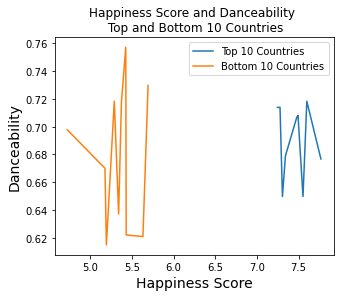

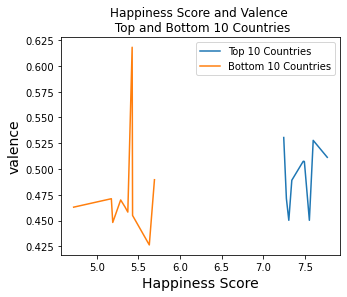

In [40]:
#graphing a line plot for every song's danceability in top and bot
plt.figure(figsize=(5,4))
sns.lineplot(x="happiness_score",y="danceability",
             label="Top 10 Countries", data=topfinal,
             ci=None)

sns.lineplot(x="happiness_score",y="danceability",
             label="Bottom 10 Countries",
             data=botfinal,
             ci=None)

plt.xlabel("Happiness Score", size=14)
plt.ylabel("Danceability", size=14)
plt.title("Happiness Score and Danceability \n Top and Bottom 10 Countries")
plt.show()
#graphing a line plot for every song's valence in top and bot
plt.figure(figsize=(5,4))
sns.lineplot(x="happiness_score",y="valence",
             label="Top 10 Countries", data=topfinal,
             ci=None)

sns.lineplot(x="happiness_score",y="valence",
             label="Bottom 10 Countries",
             data=botfinal,
             ci=None)

plt.xlabel("Happiness Score", size=14)
plt.ylabel("valence", size=14)
plt.title("Happiness Score and Valence \n Top and Bottom 10 Countries")
plt.show()

#### Happiness Score and Danceability
**Graph Interpretation**<br>
This graphs all danceability scores for the top and bottom 10 happiest countries. At first glance, there appears to be a minor trend for the top 10 countries in that the danceability score remains above 0.65 despite there being a decrease at ~7.3 and ~7.51. In comparing both top and bottom 10 countries, however, we cannot draw a truly significant relationship given that many countries from the bottom 10 have relatively high danceability scores – in particular at ~5.3 – as those danceability scores from the top 10 countries. 

#### Happiness Score and Valence
**Graph Interpretation**<br>
This graphs all valence scores for the top and bottom 10 happiest countries. It becomes clear that the bottom 10 countries have a wider range of valence values compared to the top 10 countries. The range of the bottom 10 countries starts from as low as ~0.425 to as high as ~0.620 (a range of ~0.195). Conversely, the top countries' range starts at ~0.450 and only goes as high as ~0.527 ( a range of ~0.077). Most notably, there are considerably more countries – or possibly just one – with higher valence values than any of the top 10 countries. This may due to the presence of an outlier, which we identify later as the Dominican Republic.

#### Averages of each country's Spotify generated scores `avg`

In [41]:
avg=finalsongs2019.groupby('country').mean()
avg

,position,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,rank,happiness_rank,happiness_score
country,,,,,,,,,,,,,,,,,
Austria,25.5,16462.584011,0.713867,0.662443,5.689011,-6.275741,0.430055,0.155285,0.249452,0.010681,0.153707,0.530584,121.137222,187213.974231,0.0,10.0,7.246
Canada,25.5,105777.108516,0.713905,0.594117,5.139505,-6.508806,0.545824,0.130653,0.240444,0.011077,0.169140,0.471375,117.942354,191437.583187,0.0,9.0,7.278
Denmark,25.5,37138.216813,0.718297,0.608354,5.452143,-6.452041,0.455000,0.126762,0.236351,0.007709,0.152468,0.527824,118.132190,185525.915714,0.0,2.0,7.600
Dominican Republic,25.5,7559.400769,0.757185,0.703511,6.165440,-4.862544,0.527857,0.146937,0.260556,0.006872,0.161468,0.618115,124.096521,230480.686209,1.0,77.0,5.425
Finland,25.5,27875.240879,0.676773,0.663020,5.129560,-6.368836,0.446484,0.092529,0.201814,0.009496,0.168731,0.511384,119.129309,199207.537033,0.0,1.0,7.769
Greece,25.5,6125.118736,0.718423,0.632274,5.500055,-6.665205,0.448297,0.138264,0.252965,0.013671,0.158110,0.470025,119.224728,195010.707857,1.0,82.0,5.287
Hong Kong,25.5,7709.870385,0.622039,0.566009,5.290769,-6.735000,0.682473,0.081686,0.341515,0.007200,0.166651,0.455022,119.366519,211687.606703,1.0,76.0,5.430
Iceland,25.5,3493.017747,0.708010,0.575703,5.475385,-7.531244,0.501923,0.114460,0.253068,0.015873,0.175444,0.507280,120.274468,191780.606703,0.0,4.0,7.494
Indonesia,25.5,97616.694066,0.614861,0.524393,5.441923,-7.401547,0.740055,0.068383,0.386864,0.005162,0.160713,0.448238,115.804843,220788.384121,1.0,92.0,5.192


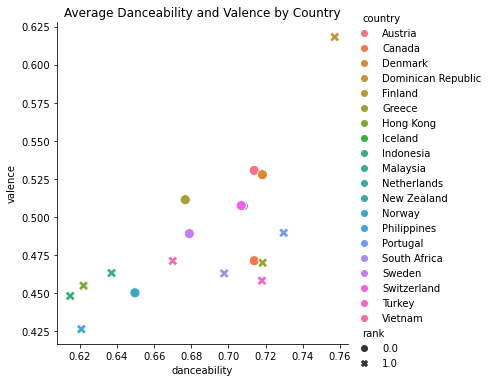

In [43]:
scatter=sns.relplot(x='danceability', y='valence',style='rank', hue=avg.index, data=avg, alpha=1, s=100)
#plt.title("Rolling Average Mean (2 weeks) Happiness and Valence \n Top 10 Happy Countries")
# plt.legend(title='Rank', loc='best', labels=['Top', 'Bottom'])

plt.title("Average Danceability and Valence by Country")
plt.show(scatter)

This graph is plots our average danceability and valence for the top 10 and the bottom 10 happiest countries, which can be seen on the right (0.0=top, 1.0=bot). The bottom 10 countries have a slightly lower average score than that of the top 10 countries (e.g., Indonesia compared to Denmark), but this is not significant. 

However, in this graph we found our outlier: the Dominican Republic. Although the Dominican Republic has a low happiness rank of 69, it has the highest average danceability and average valence score (average danceability score of about 0.755 and average valence score of about 0.63). We attribute this outlier to cultural differences, such as song and dance being embedded into hispanic culture.

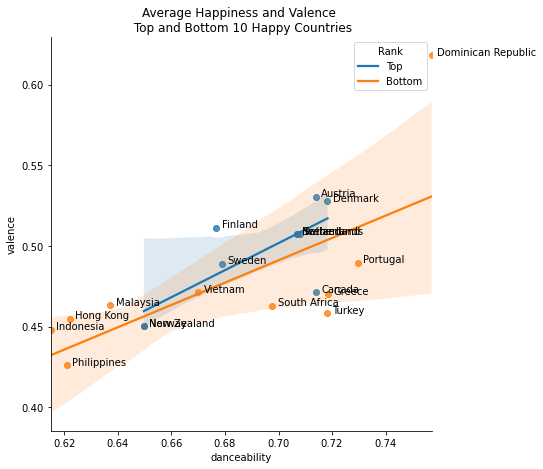

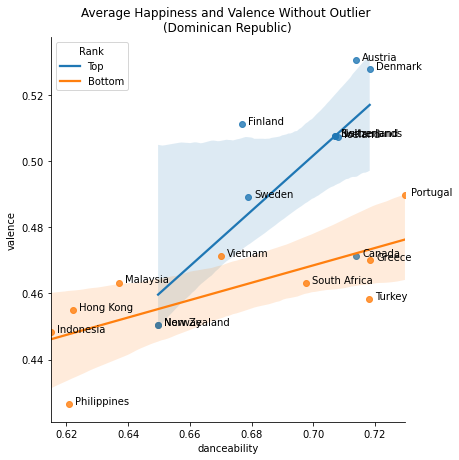

In [44]:
p1=sns.lmplot(x='danceability', y='valence', height=6,hue='rank',data=avg, legend=False)
plt.legend(title='Rank', loc='best', labels=['Top', 'Bottom'])
ax = p1.axes[0,0]

for line in range(0,avg.shape[0]):
     ax.text(avg.danceability[line]+0.002, avg.valence[line], 
     avg.index[line], horizontalalignment='left', 
     size='medium', color='black')
plt.title("Average Happiness and Valence \n Top and Bottom 10 Happy Countries")
plt.show()

withoutdr=avg.drop(["Dominican Republic"],axis=0)
p2=sns.lmplot(x='danceability', y='valence', hue="rank",data=withoutdr, legend=False, height=6.5)
#plt.title("Rolling Average Mean (2 weeks) Happiness and Valence \n Top 10 Happy Countries")
plt.legend(title='Rank', loc='upper left', labels=['Top', 'Bottom'])
plt.title("Average Happiness and Valence Without Outlier \n(Dominican Republic)")

ax = p2.axes[0,0]

for line in range(0,withoutdr.shape[0]):
     ax.text(withoutdr.danceability[line]+0.002, withoutdr.valence[line], 
     withoutdr.index[line], horizontalalignment='left', 
     size='medium', color='black')
plt.tight_layout()
plt.show()

*Note: There is an overlap of three countries at around <b>(0.71, 0.51)</b> including Iceland, Switzerland, and the Netherlands. These countries are not easily discernable in the graph. Similarly, there are two countries at around <b>(0.65, 0.45)</b>: New Zealand and Norway.*

#### Average Happiness and Valence Top and Bottom 10 Happy Countries
**Graph Interpretation**<br>
<p> Contrary to our expectations, the top 10 happiest countries do not have the highest danceability or valence scores. There appears to be a wide range of danceability and valence scores for all top and bottom countries, which may signify no significant relationship between the danceability and valence scores and the happiness scores of the top countries. We expected more tightly clustered results for both top and bottom happy countries. <p>
    
<p>There is a wider range of values for danceability and valence covered by the bottom 10 happiest countries, which makes sense given that these countries start at a lower danceability and valence score than the top 10 countries. Specifically, the danceability of the bottom countries begins at ~0.61, compared to ~0.66 for the top countries. Similarly, the valence score for the bottom countries begins at ~0.43, as opposed to ~0.45 for the top countries.<p>
    
<p>The lower range of valence and danceability scores for the bottom 10 countries supports the idea that less happy countries listen to music that is not as danceable or "happy." The fact that many of the bottom 10 countries rank in the same range of danceability and valence scores as the top countries make it difficult to observe a relationship between how happy a country is and the music the country listens to just on these two variables alone.<p>

#### The same graph, without the the outlier (Dominican Republic)
 **Graph Interpretation**<br>
With this in mind, we wanted to see the extent to which the line of best fit for the top countries would be impacted without the Dominican Republic (the outlier). As can be seen, this line of best fit for the top countries became steeper without it. There is far clearer linear relationship for all the top countries, which seems to be far more removed from the rest of the bottom countries. We will evaluate this line of best fit by performing a linear regression model later in our analysis.

#### Correlation Scores

Before performing linear regression and multiple regression, we wanted to quickly make heatmaps for the top 10 countries and bottom 10 to discover variables that had relevant relationships with each other.

In [45]:
avg=avg.sort_values(["happiness_score"],ascending=False)

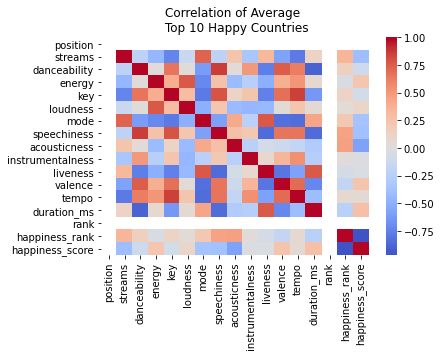

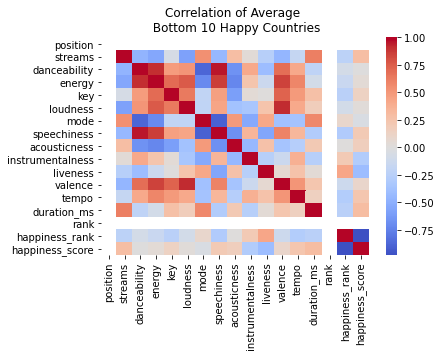

In [46]:
sns.heatmap(avg.head(10).corr(), center=0, cmap='coolwarm')
plt.title("Correlation of Average \n Top 10 Happy Countries")
plt.show()

sns.heatmap(avg.tail(10).corr(), center=0, cmap='coolwarm')
plt.title("Correlation of Average \n Bottom 10 Happy Countries")
plt.show()

#### Top 10 Heatmap Correlation
When looking at the danceability's average score with the happiness score, you can see that there is a negative correlation that is not strong because the shade of the blue is very light. The same goes for valence, except it is a postive correlation because it is a light shade of red. According to the heatmap, the strongest correlation-- which also happens to be negative-- the happiness score of the top 10 happiest countries has is with the average acousticness, but the correlation is still weak. 
#### Bot 10 Heatmap Correlation
When looking at the danceability's average score with the happiness score, you can see that there is a negative correlation that is not strong because the shade of the blue is very light, almost close to white which means that the correlation is close to 0.0 (no correlation). The same goes for valence, except it is a postive correlation because it is a light shade of red. According to the heatmap, the strongest correlation-- which also happens to be negative-- the happiness score of the bottom 10 happiest countries has is with the average liveness, but the correlation is still weak. 

### 2. Patterns in the Data<a name="IV2"></a>
The following chart shows the steps we will take to conduct the analyses we preregistered. First, we will take the rolling average over the `finalsongs2019` DataFrame In order to visualize the general trends of the popular songs that a country listens to, we need reduce the noice that is inevitable with so many observations (365x50=18250) per country. After reducing the noise and running some more exploratory analyses, we will run 2 sets of of single and multiple regressions: one with and one without the outlier.

#### Rolling Avg on the Top Songs 2019 `topfinalrolling`

In [55]:
#rolling avg on danceability
topfinalrolling = topfinal.groupby('country', sort=False)[['danceability']].rolling(window=14).mean().reset_index()
topfinalrolling=topfinalrolling.merge(topbot[['country','happiness_score']], how='left',on='country')
topfinalrolling=topfinalrolling.drop(columns=['level_1'])

In [56]:
#appending rolling avg of valence
rolling2=topfinal.groupby('country', sort=False)[['valence']].rolling(window=14).mean().reset_index()
topfinalrolling['valence']=rolling2['valence']
rolling2['danceability']=topfinalrolling['danceability']

`topfinalrolling` will contain the rolling average of two weeks for **danceability** and **valence** for only the **top 10 countries.**

In [57]:
topfinalrolling #df on the top countries that has the rolling avg of 14 days for scores for danceability and valence

,country,danceability,happiness_score,valence
0,Austria,NaN,7.246,NaN
1,Austria,NaN,7.246,NaN
2,Austria,NaN,7.246,NaN
3,Austria,NaN,7.246,NaN
4,Austria,NaN,7.246,NaN
...,...,...,...,...
181995,Switzerland,0.762643,7.480,0.539857
181996,Switzerland,0.757500,7.480,0.513429
181997,Switzerland,0.754071,7.480,0.526714
181998,Switzerland,0.758000,7.480,0.529286


#### Rolling Avg on the Bot Songs 2019 `botfinalrolling`
we run the same procedure as above to get the rolling avg of 2 weeks for danceability and valence

In [58]:
botfinalrolling=botfinal.groupby('country', sort=False)[['danceability']].rolling(window=14).mean().reset_index()
botfinalrolling=botfinalrolling.merge(topbot[['country','happiness_score']], how='left',on='country')
botfinalrolling=botfinalrolling.drop(columns=['level_1'])

In [59]:
rolling3=botfinal.groupby('country', sort=False)[['valence']].rolling(window=14).mean().reset_index()
botfinalrolling['valence']=rolling3['valence']
rolling3['danceability']=botfinalrolling['danceability']

`botfinalrolling` will contain the rolling average of two weeks for **danceability** and **valence** for only the **top 10 countries.**

In [60]:
botfinalrolling

,country,danceability,happiness_score,valence
0,Dominican Republic,NaN,5.425,NaN
1,Dominican Republic,NaN,5.425,NaN
2,Dominican Republic,NaN,5.425,NaN
3,Dominican Republic,NaN,5.425,NaN
4,Dominican Republic,NaN,5.425,NaN
...,...,...,...,...
181995,Vietnam,0.679000,5.175,0.492686
181996,Vietnam,0.686071,5.175,0.486614
181997,Vietnam,0.680643,5.175,0.488043
181998,Vietnam,0.659286,5.175,0.494614


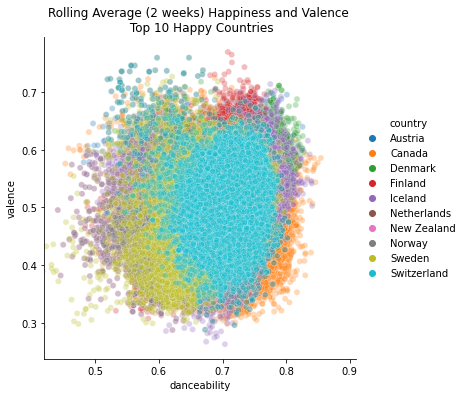

<Figure size 7200x3240 with 0 Axes>

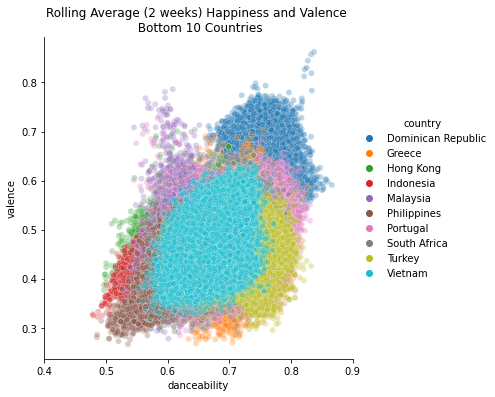

<Figure size 7200x3240 with 0 Axes>

In [61]:
scatter=sns.relplot(x="danceability", y="valence", hue="country", data=topfinalrolling, alpha=0.3)
plt.title("Rolling Average (2 weeks) Happiness and Valence \n Top 10 Happy Countries")
plt.tight_layout
plt.figure(figsize = (100, 45))
scatter.set(xlim=(.42,0.91))
plt.show()

scatter=sns.relplot(x='danceability', y='valence', hue='country', data=botfinalrolling, alpha=0.3)
plt.title("Rolling Average (2 weeks) Happiness and Valence \n Bottom 10 Countries")
plt.tight_layout
plt.figure(figsize = (100, 45))
scatter.set(xlim=(.4,0.9))
plt.show()

The scatterplots for the top and bot quickly visualize all the rolling average points of each country. We wanted to observe any notable clusters by graphing it altogether. The bot 10 is slightly more variable, with more irregular shapes and slightly non-overlapping clusters. These graphs
are consistent with our previous models that there is not much significant variation from country to country.

### Training Model

After seeing from our exploratory graphs that our top countries seemed to have higher valence scores and slightly higher danceability scores, we believed that performing a training model would help cement whether or not this apparent relationship is just due to the data in 2019, or due to a significant relationship between audio features and happiness. While our graphs seemed to show some sort of relationship between happiness score, valence, and danceability, our heatmaps did not show a significant correlation between these two audio features and happiness score. Therefore, we decided to create a single-variable model for each audio feature and also a multivariable regression model that looked at all of these features. 

All of our models use our data from 2019 and then test it on our data from 2020. We chose to create both single-variable and multi-variable models in order to compare the accuracy of their predictions and see if one performed better than the other. It is important to note that we created a set of single- and multi-variable models that included data about our outlier, the DR, and then another set that excluded data from the DR. We weren't sure what the effect of an outlier would be on our model so we chose to compare the model in regards to this aspect as well.

### Single variable linear regression with outlier

In [52]:
newcol=['pred_danceability', 'pred_energy', 'pred_key',
       'pred_loudness', 'pred_mode', 'pred_speechiness', 'pred_acousticness', 'pred_instrumentalness',
       'pred_liveness', 'pred_valence', 'pred_tempo', 'pred_duration_ms']
index=0
coeff_determination=[]
predictions=pd.DataFrame()
for feature in ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms']:
    linear_model=lr()
    linear_model.fit(finalsongs2019[[feature]],finalsongs2019['happiness_score'])
    preds=linear_model.predict(finalsongs2020[['happiness_score']])
    
    predictions[newcol[index]]=preds
    index=index+1
    coeff_determination.append(round(linear_model.score(finalsongs2020[[feature]],finalsongs2020['happiness_score']),2))
    
    print('Feature: '+feature)
    print('Regression slope of '+feature+' : '+str(round(linear_model.coef_[0],3)))
    print('r^2 of '+feature+' : '+str(round(linear_model.score(finalsongs2020[[feature]],finalsongs2020.happiness_score),3))+'\n')

Feature: danceability
Regression slope of danceability : 0.373
r^2 of danceability : -0.151

Feature: energy
Regression slope of energy : 0.552
r^2 of energy : -0.168

Feature: key
Regression slope of key : -0.002
r^2 of key : -0.156

Feature: loudness
Regression slope of loudness : 0.017
r^2 of loudness : -0.154

Feature: mode
Regression slope of mode : -0.176
r^2 of mode : -0.159

Feature: speechiness
Regression slope of speechiness : 0.44
r^2 of speechiness : -0.154

Feature: acousticness
Regression slope of acousticness : -0.53
r^2 of acousticness : -0.144

Feature: instrumentalness
Regression slope of instrumentalness : -0.647
r^2 of instrumentalness : -0.156

Feature: liveness
Regression slope of liveness : 0.265
r^2 of liveness : -0.151

Feature: valence
Regression slope of valence : 0.257
r^2 of valence : -0.151

Feature: tempo
Regression slope of tempo : -0.0
r^2 of tempo : -0.156

Feature: duration_ms
Regression slope of duration_ms : -0.0
r^2 of duration_ms : -0.106



####  Description for Work Above
Here, we fit a linear regression model for each of the audio features we can obtain through the Spotify API. We first fit the model on our data from 2019 with the audio features forming the training set and the happiness score being the target variable. We then used this model to try and predict the happiness scores of countries based on their top song audio features from 2020. Above, we print the regression slope of each feature and the coefficient of determination for each model.

We also append the predicted happiness score to a dataframe named `Predictions` so we can later visually compare the accuracy of the predicitons in relation to the actual happiness score. 

In [53]:
predictions['country']=finalsongs2020['country']
predictions=predictions.merge(happy2020,on='country')
predictions.drop_duplicates(subset=["country"],inplace=True, ignore_index=True)
predictions.rename({"happiness_score":"obs_happiness_score"}, axis="columns", inplace=True)


first_column = predictions.pop('obs_happiness_score')
predictions.insert(0, 'obs_happiness_score', first_column)
first_column = predictions.pop('country')
predictions.insert(0, 'country', first_column)
predictions.drop(["happiness_rank"], axis=1, inplace=True)

####  Description for Work Above
The `Predictions`dataframe contains the true happiness scores of each country in the `obs_happiness_score` column. The other columns are the predicted happiness score based on the audiofeature. For example, `pred_danceability` is the predicted happiness scores for each country based on a country's danceability scores for their top songs.

In [54]:
predictions

,country,obs_happiness_score,pred_danceability,pred_energy,pred_key,pred_loudness,pred_mode,pred_speechiness,pred_acousticness,pred_instrumentalness,pred_liveness,pred_valence,pred_tempo,pred_duration_ms
0,Finland,7.8087,9.044893,10.363976,6.385693,6.641999,5.110137,9.776612,2.403191,1.345344,8.417374,8.274791,6.443398,7.044178
1,Denmark,7.6456,8.984134,10.273988,6.386071,6.639170,5.138869,9.704850,2.489578,1.450890,8.374162,8.232841,6.443475,7.044179
2,Switzerland,7.5599,9.044893,10.363976,6.385693,6.641999,5.110137,9.776612,2.403191,1.345344,8.417374,8.274791,6.443398,7.044178
3,Iceland,7.5045,9.044893,10.363976,6.385693,6.641999,5.110137,9.776612,2.403191,1.345344,8.417374,8.274791,6.443398,7.044178
4,Norway,7.4880,9.044893,10.363976,6.385693,6.641999,5.110137,9.776612,2.403191,1.345344,8.417374,8.274791,6.443398,7.044178
5,Netherlands,7.4489,9.044893,10.363976,6.385693,6.641999,5.110137,9.776612,2.403191,1.345344,8.417374,8.274791,6.443398,7.044178
6,Sweden,7.3535,8.875319,10.112827,6.386749,6.634102,5.190325,9.576331,2.644292,1.639914,8.296774,8.157711,6.443611,7.044180
7,New Zealand,7.2996,9.044893,10.363976,6.385693,6.641999,5.110137,9.776612,2.403191,1.345344,8.417374,8.274791,6.443398,7.044178
8,Austria,7.2942,8.952208,10.226705,6.386270,6.637683,5.153966,9.667144,2.534970,1.506348,8.351457,8.210798,6.443515,7.044179
9,Canada,7.2321,9.044893,10.363976,6.385693,6.641999,5.110137,9.776612,2.403191,1.345344,8.417374,8.274791,6.443398,7.044178


In [55]:
coeff=pd.DataFrame(columns=['danceability','energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'duration_ms'], index=["Coefficient of Determination With Outlier"])
coeff.loc["Coefficient of Determination With Outlier"] = coeff_determination

In [56]:
coeff

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Coefficient of Determination With Outlier,-0.15,-0.17,-0.16,-0.15,-0.16,-0.15,-0.14,-0.16,-0.15,-0.15,-0.16,-0.11


####  Description for Work Above
We also saved the coefficient of determination for each model in its own dataframe so we can later compare the coefficient of determinations for the single-variable linear regression model that included the outlier and the model that excluded it. 

As you can see, the coefficient of detrmination for each feature is negative. The coefficient of determination basically quantifies how well the variance in happiness score can be explained by an audio feature. A negative coefficent of determination says that 1) the model is not doing a good job at explaining the variance and 2) that a horizontal line would fit better than the model does. Oddly`duration_ms` (the length of a song) has the highest coefficient of determination. However, this coefficient is still extremely small and doesn't mean that duration score is a predictor for a country's happiness score. Further, most songs are usually the same length so it wouldn't make sense if the length of a song is able to predict happiness score since happiness scores vary while duration does not. 

As we can see with these determination scores and the following graphs, the model we created for a single variable is not very accurate.

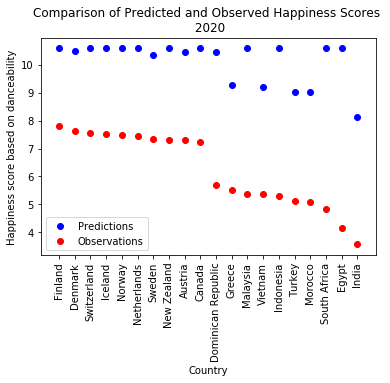

In [87]:
plt.scatter(predictions['country'],predictions['pred_danceability'],c='blue', label='Predictions')
plt.scatter(predictions['country'],predictions['obs_happiness_score'],c='red', label='Observations')
plt.legend()
plt.title('Comparison of Predicted and Observed Happiness Scores \n 2020')
plt.xlabel('Country')
plt.ylabel('Happiness score based on danceability')
plt.xticks(rotation="vertical")
plt.show()

####  Description for Work Above

Here we graph the happiness scores that were predicted based on a song danceability scores. The dots in red represent the true happiness scores per country while the dots in blue represent the predicted happiness scores. 

We can see that the happiness scores were predicted to range between around 7.8 and 9 for both the top and bottom 10 countries. However, the true happiness scores range between around 3 and 8. Further, since we look at top and bottom 10 countries, there is a distinct split between the happiness scores for the top and bottom 10 countries. The predicted values do seem to decrease/vary a bit starting with the Dominican of Republic. However, overall this is not enough to say that danceability predicted the happiness scores well.

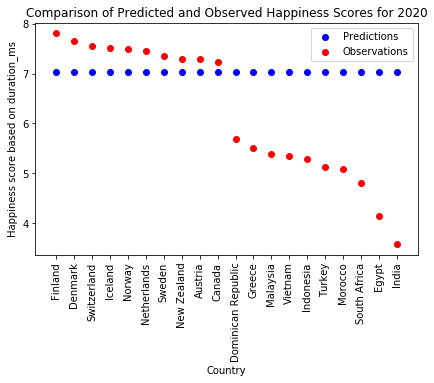

In [88]:
plt.scatter(predictions['country'],predictions['pred_duration_ms'],c='blue', label='Predictions')
plt.scatter(predictions['country'],predictions['obs_happiness_score'],c='red', label='Observations')
plt.legend()
plt.xlabel('Country')
plt.ylabel('Happiness score based on duration_ms')
plt.tight_layout()
plt.title('Comparison of Predicted and Observed Happiness Scores for 2020')
plt.xticks(rotation="vertical")
plt.show()

####  Description for Work Above
Since our duration model did seem to have the highest coefficient of determination, we decided to examine its predicted happiness scores in comparison to the true happiness scores. However, we can see that the predicted happiness scores form a linear line, likely due to the fact that the length of a song does not vary that much. The predicted happiness score is around 7 for every country. We see that duration is not a good predictor for a country's happiness score. 

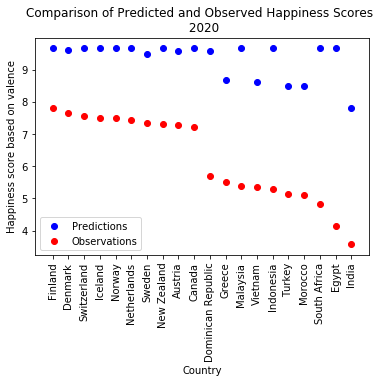

In [89]:
plt.scatter(predictions['country'],predictions['pred_valence'],c='blue', label='Predictions')
plt.scatter(predictions['country'],predictions['obs_happiness_score'],c='red', label='Observations')
plt.legend()
plt.title('Comparison of Predicted and Observed Happiness Scores \n 2020')
plt.xlabel('Country')
plt.ylabel('Happiness score based on valence')
plt.xticks(rotation="vertical")
plt.show()

####  Description for Work Above

Here we graph the predicted happiness scores that were based on valence scores. This graph is very similar to our graph for danceability. The same conclusion can be reached; valence is not a good predictor of happiness and therefore there doesn't seem to be a relationship between valence and a country's happiness.

### Multivariable Linear Regression

We decided to also create a multivariable linear regression model to see if looking at multiple audio features, in comparison to individual audio features, would yield better predictions.

Multivariable Linear Regression with Outlier

In [60]:
multi_lin_model=lr()
multi_lin_model.fit(finalsongs2019[['danceability','energy', 'valence', 'tempo']],finalsongs2019['happiness_score'])

for x, feature in enumerate(['danceability','energy', 'valence', 'tempo']):
    print('{} coefficient: {:.2f}'.format(feature, multi_lin_model.coef_[x]))

print('r^2 of the model: '+str(round((multi_lin_model.score(finalsongs2019[['danceability','energy', 'valence', 'tempo']],finalsongs2019['happiness_score'])),2)))

danceability coefficient: 0.24
energy coefficient: 0.51
valence coefficient: 0.06
tempo coefficient: -0.00
r^2 of the model: 0.01


####  Description for Work Above
We created a multivariable linear regression model by fitting a model based on only the danceability, valence, energy, and tempo features of a song. We chose to fit the model on these features as the Spotify API designates these features as the ones that make up the 'mood' of a song. Our target variable was again a country's happiness score. 

The model itself has a coefficient of determination of 0.01, which means that around 1% of the variation in happiness scores can be explained by a song's danceability, valence, energy, and tempo features. This is higher than any of the coefficients of determination we saw from the single variable regression models, however, the model hasn't been used to predict 2020 yet, which better implies whether the model is good or not. This is what we do next.

In [61]:
clist=pd.unique(finalsongs2020.country)
mult_pred_happy=[]
for country in clist:
    country_pred=finalsongs2020[finalsongs2020['country']==country]
    mean_scores=pd.DataFrame(country_pred.mean()).T
    mult_pred=multi_lin_model.predict(mean_scores[['danceability','energy', 'valence', 'tempo']])
    mult_pred_happy.append(mult_pred[0])
    coeffnum=round(multi_lin_model.score(finalsongs2020[['danceability','energy', 'valence', 'tempo']],finalsongs2020['happiness_score']),2)

In [62]:
coeffnum

-0.16

####  Description for Work Above
Here, we use the multivariable model that we created to predict the happiness scores for countries in 2020. The model has a coefficient of determination of -0.16. Again a negative coefficient of determination implies that the model is a poor fit for countries' actual happiness scores. A coefficient of determination of -0.16 is around the same as the coefficents of determination for the single-variable models. Therefore, this multivariable model doesn't do a better job at predicting countries' happiness scores than the single-variable models. 

In [63]:
multhap=pd.DataFrame()
multhap['country']=clist
multhap['pred_happiness_score']=mult_pred_happy
multhap['obs_happiness_score']=predictions['obs_happiness_score']

In [64]:
multhap

,country,pred_happiness_score,obs_happiness_score
0,Finland,6.410400,7.8087
1,Denmark,6.414613,7.6456
2,Switzerland,6.406901,7.5599
3,Iceland,6.376591,7.5045
4,Norway,6.376803,7.4880
5,Netherlands,6.404344,7.4489
6,Sweden,6.389398,7.3535
7,New Zealand,6.390633,7.2996
8,Austria,6.414807,7.2942
9,Canada,6.390204,7.2321


####  Description for Work Above
As we did with our `predictions` dataset, here we compiled the predicted happiness scores that were calculated using the model and the true happiness score for each country. This will help us visualize the discrepancies between the model's outputs and the correct outputs. 

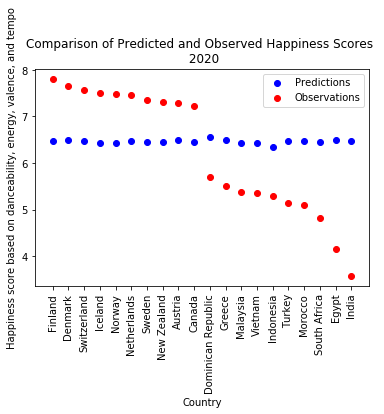

In [95]:
plt.scatter(multhap['country'],multhap['pred_happiness_score'],c='blue', label='Predictions')
plt.scatter(multhap['country'],multhap['obs_happiness_score'],c='red', label='Observations')
plt.legend()
plt.title('Comparison of Predicted and Observed Happiness Scores \n 2020')
plt.xlabel('Country')
plt.ylabel('Happiness score based on danceability, energy, valence, and tempo')
plt.xticks(rotation="vertical")
plt.show()

####  Description for Work Above
Above, we plot the happiness scores that our multivariable linear regression model predicts for countries in 2020. The predicted happiness scores are all around 6.4 and they seem to form a linear graph. However, again the predicted and actual observations are very different and emphasize that even with a multivariable graph, the relationship between songs and happiness score is not strong enough to create a model.

### Single-Variable Linear Regression Model without the Outlier

As we said before, we also wanted to create the single- and multivariable linear regression models with data that excluded the Dominican Republic since the DR did seem to be an outlier in terms of its valence score. Here we create the single-variable model is fitted on 2019 data that excludes the DR.

In [66]:
finalsongs2019nooutlier=finalsongs2019[finalsongs2019["country"]!="Dominican Republic"]
finalsongs2019nooutlier.reset_index(inplace=True, drop=True)

In [100]:
newcol=['pred_danceability', 'pred_energy', 'pred_key',
       'pred_loudness', 'pred_mode', 'pred_speechiness', 'pred_acousticness', 'pred_instrumentalness',
       'pred_liveness', 'pred_valence', 'pred_tempo', 'pred_duration_ms']
index=0
coeff_determination=[]
predictions=pd.DataFrame()
for feature in ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms']:
    linear_model=lr()
    linear_model.fit(finalsongs2019nooutlier[[feature]],finalsongs2019nooutlier['happiness_score'])
    preds=linear_model.predict(finalsongs2020[['happiness_score']])
    
    predictions[newcol[index]]=preds
    index=index+1
    coeff_determination.append(round(linear_model.score(finalsongs2020[[feature]],finalsongs2020['happiness_score']),2))
    
    print('Feature: '+feature)
    print('Regression slope of '+feature+' : '+str(round(linear_model.coef_[0],3)))
    print('r^2 of '+feature+' : '+str(round(linear_model.score(finalsongs2020[[feature]],finalsongs2020.happiness_score),3))+'\n')

Feature: danceability
Regression slope of danceability : 0.585
r^2 of danceability : -0.12

Feature: energy
Regression slope of energy : 0.766
r^2 of energy : -0.144

Feature: key
Regression slope of key : 0.001
r^2 of key : -0.125

Feature: loudness
Regression slope of loudness : 0.034
r^2 of loudness : -0.123

Feature: mode
Regression slope of mode : -0.187
r^2 of mode : -0.131

Feature: speechiness
Regression slope of speechiness : 0.622
r^2 of speechiness : -0.124

Feature: acousticness
Regression slope of acousticness : -0.564
r^2 of acousticness : -0.114

Feature: instrumentalness
Regression slope of instrumentalness : -0.724
r^2 of instrumentalness : -0.126

Feature: liveness
Regression slope of liveness : 0.28
r^2 of liveness : -0.122

Feature: valence
Regression slope of valence : 0.441
r^2 of valence : -0.12

Feature: tempo
Regression slope of tempo : -0.0
r^2 of tempo : -0.126

Feature: duration_ms
Regression slope of duration_ms : -0.0
r^2 of duration_ms : -0.083



####  Description for Work Above
We fit the model on our data from 2019 and use the model to predict the happiness scores for 2020. We print the regression slope and the coefficient of determination for each model.

In [68]:
predictions['country']=finalsongs2020['country']
predictions=predictions.merge(happy2020,on='country')
predictions.drop_duplicates(subset=["country"],inplace=True, ignore_index=True)
predictions.rename({"happiness_score":"obs_happiness_score"}, axis="columns", inplace=True)


first_column = predictions.pop('obs_happiness_score')
predictions.insert(0, 'obs_happiness_score', first_column)
first_column = predictions.pop('country')
predictions.insert(0, 'country', first_column)
predictions.drop(["happiness_rank"], axis=1, inplace=True)

In [69]:
predictions

,country,obs_happiness_score,pred_danceability,pred_energy,pred_key,pred_loudness,pred_mode,pred_speechiness,pred_acousticness,pred_instrumentalness,pred_liveness,pred_valence,pred_tempo,pred_duration_ms
0,Finland,7.8087,10.608841,11.958781,6.444277,6.939227,5.080662,11.231677,2.197601,0.797876,8.583020,9.675989,6.460023,7.028887
1,Denmark,7.6456,10.513488,11.833907,6.444137,6.933653,5.111198,11.130172,2.289556,0.915941,8.537360,9.604031,6.460049,7.028887
2,Switzerland,7.5599,10.608841,11.958781,6.444277,6.939227,5.080662,11.231677,2.197601,0.797876,8.583020,9.675989,6.460023,7.028887
3,Iceland,7.5045,10.608841,11.958781,6.444277,6.939227,5.080662,11.231677,2.197601,0.797876,8.583020,9.675989,6.460023,7.028887
4,Norway,7.4880,10.608841,11.958781,6.444277,6.939227,5.080662,11.231677,2.197601,0.797876,8.583020,9.675989,6.460023,7.028887
5,Netherlands,7.4489,10.608841,11.958781,6.444277,6.939227,5.080662,11.231677,2.197601,0.797876,8.583020,9.675989,6.460023,7.028887
6,Sweden,7.3535,10.342717,11.610267,6.443885,6.923670,5.165884,10.948385,2.454239,1.127385,8.455588,9.475160,6.460096,7.028888
7,New Zealand,7.2996,10.608841,11.958781,6.444277,6.939227,5.080662,11.231677,2.197601,0.797876,8.583020,9.675989,6.460023,7.028887
8,Austria,7.2942,10.463385,11.768293,6.444063,6.930724,5.127242,11.076837,2.337873,0.977977,8.513369,9.566221,6.460063,7.028888
9,Canada,7.2321,10.608841,11.958781,6.444277,6.939227,5.080662,11.231677,2.197601,0.797876,8.583020,9.675989,6.460023,7.028887


####  Description for Work Above
As we did when we fit single-variable linear regression models for the 2019 data with DR data included, we make another dataframe that compares the happiness scores that each single-variable model outputted. This will help us visually compare the model's predictions with the true happiness scores later. 

In [70]:
coeffwithoutoutlier=pd.DataFrame(columns=['danceability','energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'duration_ms'], index=["Coefficient of Determination Without Outlier"])
coeffwithoutoutlier.loc["Coefficient of Determination Without Outlier"] = coeff_determination
coeff=coeff.append(coeffwithoutoutlier)

In [71]:
coeff

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Coefficient of Determination With Outlier,-0.15,-0.17,-0.16,-0.15,-0.16,-0.15,-0.14,-0.16,-0.15,-0.15,-0.16,-0.11
Coefficient of Determination Without Outlier,-0.12,-0.14,-0.13,-0.12,-0.13,-0.12,-0.11,-0.13,-0.12,-0.12,-0.13,-0.08


#### Description for Work Above
Above, we compare the coefficient of determination for all of the single-variable linear regression models. It appears that when we remove the Dominican Republic, our outlier, from the data used to train all the models, the coefficient of determination improves by 0.03 for each respect audio feature. However, all the coefficients of determination for each model are still negative, showing that removing the outlier did not improve the single-variable enough for it to now be significant.  

We will now see if this pattern continues for the multivariable models.

In [72]:
multi_lin_model=lr()
multi_lin_model.fit(finalsongs2019nooutlier[['danceability','energy', 'valence', 'tempo']],finalsongs2019nooutlier['happiness_score'])

for x, feature in enumerate(['danceability','energy', 'valence', 'tempo']):
    print('{} coefficient: {:.2f}'.format(feature, multi_lin_model.coef_[x]))

print('r^2 of the model: '+str(round((multi_lin_model.score(finalsongs2019nooutlier[['danceability','energy', 'valence', 'tempo']],finalsongs2019nooutlier['happiness_score'])),2)))

danceability coefficient: 0.38
energy coefficient: 0.66
valence coefficient: 0.17
tempo coefficient: -0.00
r^2 of the model: 0.02


#### Description for Work Above
We fit a multivariable linear regression for our 2019 data that excluded the Dominican Republic. This model has a coefficient of determination of 0.02, which means that around 2% of the variance in happiness scores in 2019 can be explained by a country's top songs, specifically the songs' danceability, energy, acousticness, liveness, valence, tempo, and duration. However, this is the score for the model when it predicts data in 2019. We want to know whether this model is able to predict the happiness scores for countries in a different year. 

Now we use the model to predict happiness scores in 2020.

In [73]:
clist=pd.unique(finalsongs2020.country)

mult_pred_happy=[]
for country in clist:
    country_pred=finalsongs2020[finalsongs2020['country']==country]
    mean_scores=pd.DataFrame(country_pred.mean()).T
    mult_pred=multi_lin_model.predict(mean_scores[['danceability','energy', 'valence', 'tempo']])
    mult_pred_happy.append(mult_pred[0])
    coeff=round(multi_lin_model.score(finalsongs2020[['danceability','energy', 'valence', 'tempo']],finalsongs2020['happiness_score']),2)

In [74]:
coeff

-0.14

#### Description for Work Above
After running our multivariable model on the data from 2020, we get a coefficient of determination of -0.14. This is still a negative coefficient, meaning that this model does a very poor job at predicting a country's happiness scores. -0.14 is 0.02 higher than the coefficient of determinations for the multivariable model that was fitted on 2019 that included the outlier. However, as it is still a negative number and was only improved by 0.02 it is not significant enough to say that there is a significant relationship between happiness scores and songs features.

In [75]:
multhap=pd.DataFrame()
multhap['country']=clist
multhap['pred_happiness_score']=mult_pred_happy
multhap['obs_happiness_score']=happy2020['happiness_score']
multhap

,country,pred_happiness_score,obs_happiness_score
0,Finland,6.477402,7.8087
1,Denmark,6.486772,7.6456
2,Switzerland,6.474490,7.5599
3,Iceland,6.433200,7.5045
4,Norway,6.428044,7.4880
5,Netherlands,6.468890,7.4489
6,Sweden,6.447135,7.3535
7,New Zealand,6.452899,7.2996
8,Austria,6.484584,7.2942
9,Canada,6.451473,7.2321


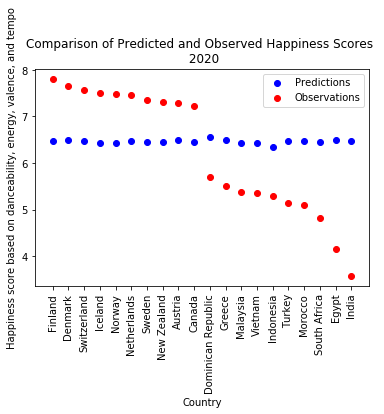

In [99]:
plt.scatter(multhap['country'],multhap['pred_happiness_score'],c='blue', label='Predictions')
plt.scatter(multhap['country'],multhap['obs_happiness_score'],c='red', label='Observations')
plt.legend()
plt.title('Comparison of Predicted and Observed Happiness Scores \n 2020')
plt.xlabel('Country')
plt.ylabel('Happiness score based on danceability, energy, valence, and tempo')
plt.xticks(rotation="vertical")
plt.show()

## V. Evaluation of significance <a name="V"></a>

In [47]:
from scipy.stats import ttest_ind
from scipy import stats

In [32]:
def permute(input_array):
    # shuffle is inplace, so copy to preserve input
    permuted = input_array.copy()
    np.random.shuffle(permuted)
    return permuted

In [36]:
def plot_model_line(df, model, is_resampled=True):
    '''
    Takes a dataframe and a fitted model
    Plots a line of best fit to the data
    '''
    if is_resampled:
        color="grey"
        alpha=0.1
    else:
        color="steelblue"
        alpha=0.7
    plt.plot(df['danceability'], df['danceability'] * model.coef_[0] + model.intercept_, color=color, alpha=alpha)

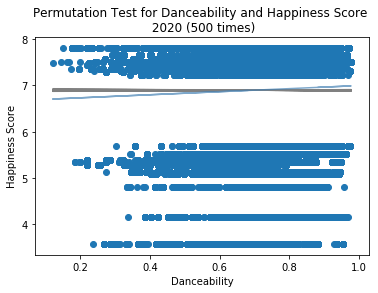

In [54]:
# plot true data
plt.scatter(finalsongs2020['danceability'], finalsongs2020['happiness_score'])

# plot 100 iterations of models on permuted data
for i in range(500):
    fake_model = lr().fit(finalsongs2020[["danceability"]], permute(finalsongs2020['happiness_score']))
    plot_model_line(finalsongs2020, fake_model)

# model true data and plot
model = lr().fit(finalsongs2020[["danceability"]], finalsongs2020["happiness_score"])
plot_model_line(finalsongs2020, model, is_resampled=False)
plt.xlabel("Danceability")
plt.ylabel("Happiness Score")
plt.title("Permutation Test for Danceability and Happiness Score \n 2020 (500 times)")

plt.show()

#### Graph Description Above
We begin by using a permutation test to test for statistical signifance in our data. A permutation test helps us build sampling distribution rather than simply assuming this is the case. In our case, we are shuffling the happiness scores (our y, or dependent variable) without any replacement. The line in gray represents the line of best fit for the actual observed happiness and danceability scores for 2020. The blue line of best fit tells us the slope of the 500 permutations we did. 

We want to create a situation in which there is no relationship between our variables (under the null hypothesis) by breaking any relaitonship between x and y, and this is precisely what our graph proves by centering the slopes around 0. 

## VI. Interpretation and conclusions <a name="VI"></a>

We hypothesized that a country’s happiness score could be predicted by the type of music the people of that country listen to. Specifically, we thought features like how danceable a song is would ultimately give us more insight into the overall happiness of people from this country. Following the [measures of mood from Spotify](https://developer.spotify.com/discover/#audio-features-analysis), we tested if danceability, valence, energy, and tempo could predict happiness. However, our results indicated the opposite, showing that these song features along are unfit for determining a country’s happiness. Therefore, Spotify-generated audio features are not a good predicting tool for a country’s happiness, as determined by its happiness score.<br>

We performed a rolling average of two weeks for the songs of the top and bottom 10 happiest countries to discern any relationships. An assumption we had to make was that fourteen days was sufficient to conclude for the general music patterns observed in these countries, which limits our interpretations to this window. This was done for optimization reasons. As it pertains to our reasoning behind deciding to run a rolling average, we wanted to understand the possibility of there being a relationship between happiness score and individual features over fourteen days. A rolling, or moving, average analyzes data points by creating a series of averages of different subsets of a full data set, which seemed appropriate for our purposes since we were working with a dataset of 20 countries for one year. Although we acknowledge that it would have been more compelling to evaluate a rolling average over a longer period beyond fourteen days, this was impractical given time constraints. We attempted to do this, and the calculation took over four hours; further, the Spotify API – which we are using to obtain all the features for our Spotify songs – could only be run a specific number of times before we got a timing error. Spotify updated its usage terms for its API, hence doing a longer period resulted virtually impossible.

The rolling average results were consistent with our hypothesis, asserting that happier countries listened to music with higher danceability and valence scores. In particular, the line of best fit was steeper for top countries, and its distribution of country rolling averages of danceability and valence scores started at a higher score than the bottom countries. By the same token, the distribution of the bottom countries was scattered below the valence distribution of the top countries, which means that top countries were scoring relatively higher in valence score than the bottom countries. Most compellingly, we observed an outlier with the Dominican Republic as one of our bottom happy countries, which unexpectedly ranked extraordinarily high for its danceability and valence score. In fact, it was the highest valence and danceability score out of all 20 countries in this dataset. We understood this extreme outlier likely influenced our interpretation results of significance, so we resorted to performing the correlation of these rolling averages to see which features were correlated and better for further analysis.

We noticed that the happiness score had a relatively weak (near zero) correlation with valence and danceability – our two main analysis features – so we proceeded to do a single-variable linear regression model to predict happiness score for 2020 (including all individual features). Given that the Dominican Republic resulted in an extreme outlier, we felt it was appropiate to run the single-variable linear regression without the Dominican Republic, though we did this **after** running our model with the country included. Specifically, we focused on using certain features (danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and duration_ms) as our predictor variables and our happiness score as our outcome variable. Doing a linear regression model was appropriate for our model because we had already done the correlation of some of these features and happiness score, which all resulted in insignificant results. Therefore, modeling the relationship between happiness score and these features seemed most adequate by fitting a linear equation to the observed data. Our $r^2$ values for each feature, excluding the outlier Dominican Republic, were as followed: danceability had a value of -0.12, energy had a value of -0.144, key had a value of -0.125, loudness had a value of -0.123, mode had a value of -0.131, speechiness had a value of -0.124, acousticness had a value of -0.114, instrumentalness had a value of -0.126, liveness had a value of -0.122, valence had a value of -0.12, tempo had a value of -0.126, and duration_ms had a value of -0.083. Our $r^2$ values were negative for all features, which indicates that our model using these features is a bad predictor of happiness score. "Bad" in our context means these features are virtually trivial to predict what kind of music a country listens to. It is worth noting these features included danceability and valence.

With this in mind, we understood individual features were not particularly helpful to predict the happiness score of countries from 2020, so we felt compelled to try a multivariable linear regression model to observe how impactful all the [aforementioned] features were in predicting 2020 countries' happiness scores.The $r^2$ values we had for the multivariable model were -0.1( with the outlier) and -0.08 (without the outlier). All our $r^2$ values were negative, which means our multivariable model was not particularly good at predicting the happiness score of these countries. Specifically, this means features like danceability and valence, among others – together – are not good tools to predict what kind of music a country listens to. It should be noted that we ran a single-variable linear regression model after this multivariable regression model, but without the Dominican Republic included. Similarly, we also ran a multivariable linear regression model without the Dominican Republic. Both of these models resulted in similar results; their $r^2$ were also negative, thereby making our model ineffective to predict happiness scores for 2020.

Without prior knowledge about this potential relationship between a country’s happiness and these Spotify features, analysts could potentially predict a country’s general happiness using features like liveness and danceability. This can be seen as a useful metric for this purpose, given the ability of music to uplift or distress people, which would be generalized to the entire population of certain countries. In particular, we often associate music with mood, given the ability of music to stimulate certain emotions or sensations. A prediction of this sort would theoretically impulse policy-makers – or anyone striving for the overall well-being of a given country – to implement measures and activities using music. Countries ranking low on their happiness score would attempt to assimilate to the music followings of higher-ranking countries on their happiness score. As it relates, pursuing a goal like this is not indicative of a country’s happiness and will likely produce a negligible effect on the country’s happiness. 
<br><br>
Notwithstanding, there may be positive outcomes in following through with this approach. Although this would require further research on the subject matter, the exposure to “happy” music – as determined by high scores of danceability, or other similar features – can improve the well-being and emotional state of people.  Indeed, authors writing on behalf of the American Psychological Association studied precisely this relationship in 2010, asserting that “happiness ratings were elevated for fast-tempo and major key-stimuli and sadness ratings were elevated for slow-tempo and minor-key stimuli" (Hunter). A different relationship may be observed in a longer period than 14 weeks, but this would require the use of more developed tools beyond only using the Spotify API, given the constraints it poses.


## VII. Data Limitations<a name="VII"></a>
1. We had originally planned to use 53 countries (all the countries available on Spotify). However, when we began creating our Spotify API dataset, we received a "max entries error." Because of the limit of the number of calls on the Spotify API, we decided to only use the top ten and bottom ten happiest countries. Instead of analyzing the whole dataset, we had to use a biased sample. By excluding more foreign countries, we were unable to analyze interesting outliers whose cultural differences affected the data.
<br><br>
2. Our project was created on the assumption that happier countries may listen to happier music. This generalization means that our analyses forgo individual tastes and preferences. Even in a college environment of people of the same age living in the same area, there is extreme variability in music tastes and how a person uses music to cope. For example, one of us listens to happy music to boost our mood when we're sad, and another listens to sad music when they're sad to face grief. Music tastes have always been highly variable, but we cannot consider this when looking for general trends between countries. 
<br><br>
3. Using the Western music platform Spotify in itself is another limitation because it excludes the other music platforms that may be more popular in different countries. Spotify is not representative of all music platforms' data on global music streaming. For example, Spotify probably does not have all the rights for Vietnamese music. Therefore, people in Vietnam use a different platform for Vietnamese music and Spotify to listen to Western music. That being said, not having access to the actual popular songs of a country means that our model is not predicting on accurate data.
<br> <br>
4. Our bottom 10 countries are not truly the least happy countries according to the SDSN data. This is because wealth is a huge factor in a country's happiness score. Therefore, the almost 50 of the bottom countries (of 153) were not in the Spotify userbase because a paid music streaming platform is a luxury. When are categorizing the "bottom 10" we are actually referring to a selection of 10 around the 2nd third of the data. If we were to have the Spotify data of the actual bottom 10, then we would have a more accurate answer to our research question and probably a larger disparity between the top and bottom.
<br> <br>
5. The SDSN measures a country's happiness on a set amount of factors: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust, and Government Corruption. These are mainly related to socioeconomic status and the political state of a country. However, there are certainly more factors, such as education and employment. The SDSN takes a more material approach to happiness than a mental health one. It can be argued that a mental health approach to happiness, however that can be measured, is more related to how Spotify measures happiness. That being said, we need to remember that when we are referring to a country's happiness, it is soley based on how SDSN defines it.
<br><br>
6. When constructing our training model based on 2019 data, and used 2020 data, to predict happiness scores. Because of the circumstances of 2020 (i.e., the COVID-19), what made a song popular in 2019 could be vastly different to 2019. For example, in 2020 the app TikTok became widely popular. Many of the most popular songs in 2020 were songs discovered on TikTok. These songs became popular because of Tiktok dance trends or trends using sad music to tell a sad story.
<br><br>

7. A major limitation of using permutation to test the statistical significance of our data is that permutation works best on large sets of data. Our data is composed of the top and bottom 10 countries in terms of happiness scores; therefore, our dataset is essentially only 20 points


<a name="VIII"></a>
## VIII. Source Code <br>
GitHub  Repository: https://github.com/Albina-C/INFO-2950-Project 
<a name="IX"></a>
## IX. Acknowledgements <br>
Spotipy: https://spotipy.readthedocs.io/en/2.18.0/ 
<br>
Cloudscraper: https://pypi.org/project/cloudscraper/ 
<br>
Web-Scraping Code Inspiration: https://gist.github.com/hktosun/d4f98488cb8f005214acd12296506f48 <br>
Permutation code: https://colab.research.google.com/drive/1pMK18-DQoBDA_9rSzio6LJtkCJWxJF1g?usp=drive_open#scrollTo=FFwBCpL6lDa4
- Used Professor Wilkens’ code from April 2nd on Permutation
<a name="X"></a>
## X. Appendix <br>
[Dataset-Creation-Creation Notebook](./Dataset-Creation-Creation.ipynb)
- has information about problems creating our dataset because of added Spotify Cloudflare security